<a href="https://colab.research.google.com/github/HyEd-Aprendizaje-Maquina/3-regresion-lineal-y-logistica-seminario/blob/main/Regresi%C3%B3nLineal_Funci%C3%B3nDeP%C3%A9rdida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def generar_datos(num_puntos=20):
    """Genera datos sintéticos con algo de ruido"""
    np.random.seed(42)  # Para reproducibilidad
    X = np.linspace(0, 10, num_puntos)
    y = 2 * X + 1 + np.random.normal(0, 1, num_puntos)
    return X, y

def calcular_error_cuadratico_medio(X, y, pendiente, intercepto):
    """Calcula el Error Cuadrático Medio (ECM)"""
    y_predicho = pendiente * X + intercepto
    return np.mean((y - y_predicho) ** 2)

def graficar_linea_con_residuos(X, y, pendiente, intercepto, posicion_subgrafica):
    """Crea una subgráfica mostrando la línea y los residuos"""
    y_predicho = pendiente * X + intercepto
    ecm = calcular_error_cuadratico_medio(X, y, pendiente, intercepto)

    plt.subplot(2, 3, posicion_subgrafica)

    # Graficar los puntos de datos
    plt.scatter(X, y, color='blue', label='Puntos de datos')

    # Graficar la línea ajustada
    x_linea = np.array([0, 10])
    y_linea = pendiente * x_linea + intercepto
    plt.plot(x_linea, y_linea, color='red', label='Línea ajustada')

    # Graficar líneas verticales (residuos)
    for i in range(len(X)):
        plt.vlines(X[i], y[i], y_predicho[i], colors='green',
                  linestyles='dashed', alpha=0.5)

    plt.title(f'w={pendiente:.1f}, b={intercepto:.1f}\nMSE={ecm:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)

    # Establecer límites consistentes para los ejes
    plt.xlim(-0.5, 10.5)
    plt.ylim(-2, 25)


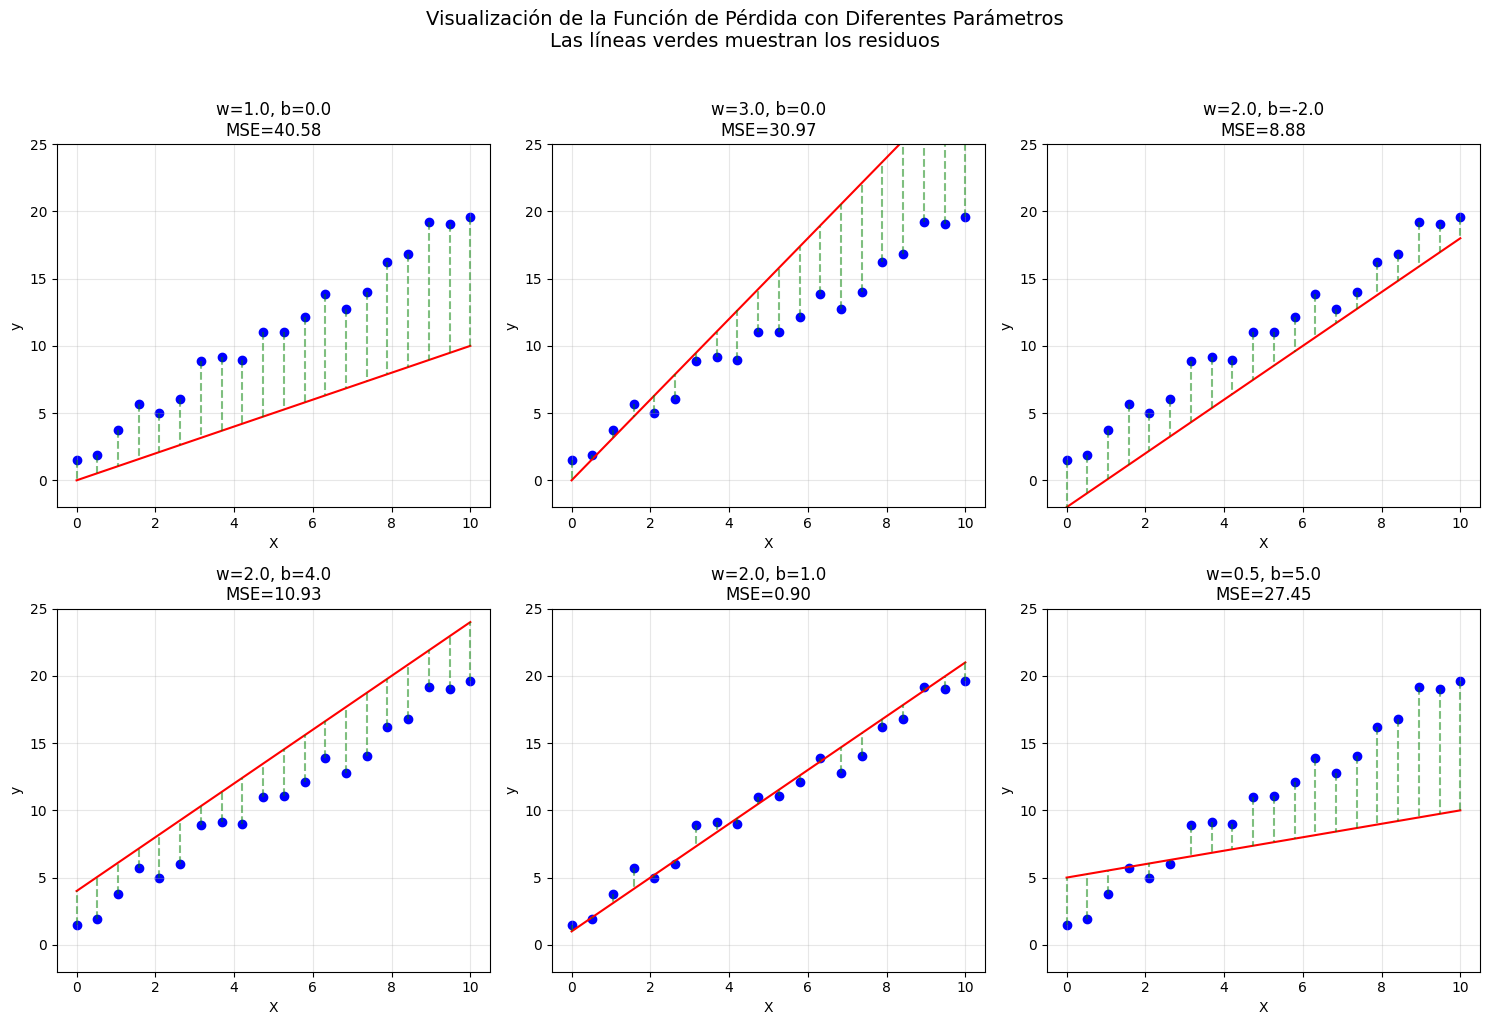

In [9]:
# Generar datos
X, y = generar_datos(20)

# Crear figura con subgráficas
plt.figure(figsize=(15, 10))

# Diferentes combinaciones de pendiente e intercepto para probar
parametros = [
    (1.0, 0.0),    # Pendiente subestimada, intercepto cero
    (3.0, 0.0),    # Pendiente sobrestimada, intercepto cero
    (2.0, -2.0),   # Buena pendiente, intercepto subestimado
    (2.0, 4.0),    # Buena pendiente, intercepto sobrestimado
    (2.0, 1.0),    # Cerca de los parámetros verdaderos
    (0.5, 5.0),    # Mal ajuste
]

# Crear todas las subgráficas
for i, (pendiente, intercepto) in enumerate(parametros, 1):
    graficar_linea_con_residuos(X, y, pendiente, intercepto, i)

# Ajustar diseño y agregar título principal
plt.suptitle('Visualización de la Función de Pérdida con Diferentes Parámetros\n' +
            'Las líneas verdes muestran los residuos',
            fontsize=14, y=1.02)
plt.tight_layout()
plt.show()